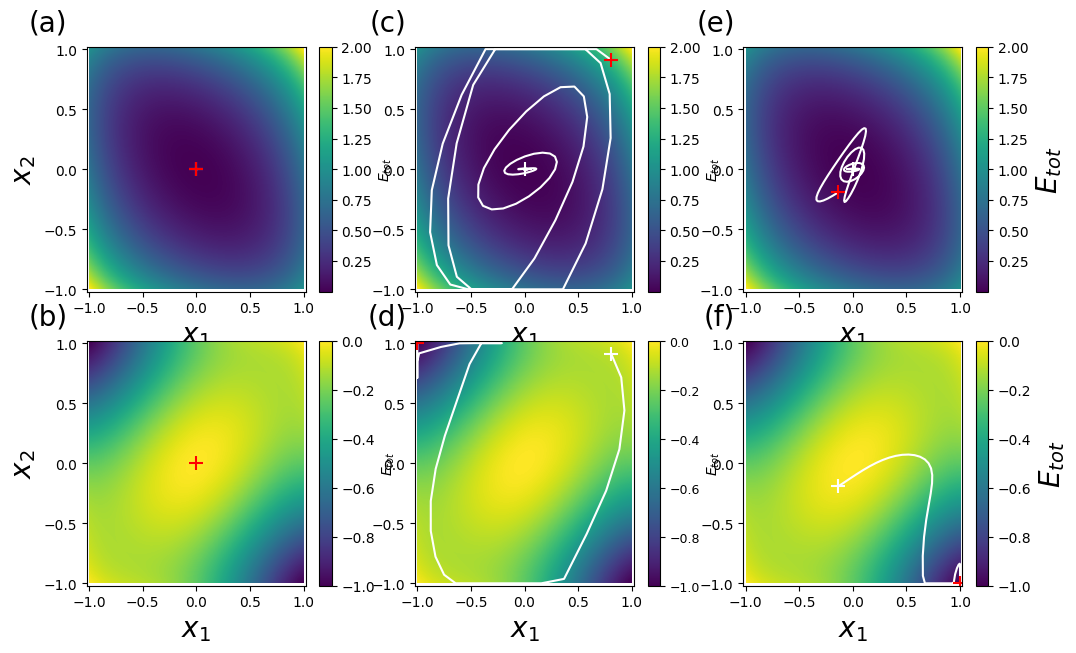

In [18]:
import numpy as np
import torch
import math
from dual_mean_field import transverse
import random
from matplotlib import pyplot as plt


def CIM_E_tot(x1_grid, x2_grid, alpha):
    J = np.array([[0,1],[1,0]])####用的实际上是[[0,-1],[-1,0]]
    E = np.zeros([x1_grid.shape[0], x1_grid.shape[1]])
    for ii in range(x1_grid.shape[0]):
        for jj in range(x1_grid.shape[1]):
            E[ii,jj] = 0.25*(x1_grid[ii,jj]**4 + x2_grid[ii,jj]**4) - 0.5*alpha* (x1_grid[ii,jj]**2+x2_grid[ii,jj]**2)+0.5*x1_grid[ii,jj]*x2_grid[ii,jj]
            # E[ii,jj] = - 0.5* alpha*(x1_grid[ii,jj]**2+x2_grid[ii,jj]**2)-0.2*x1_grid[ii,jj]*x2_grid[ii,jj]
    return E



if __name__ == "__main__":
    J = torch.tensor([[0, 1], [1, 0]])

    n_step = 200
    trials = 1
    beta = np.exp(np.linspace(math.log(0.1), math.log(20), n_step))
    SEED=random.randint(1,10000)

    # print('seed=%s'%(SEED))

    tran_g=transverse(J,beta,trials,gama=0,g=1,a_set=2,Delta_t=0.3,dev='cuda:0', c0=0.2, dtype=torch.float64, seed=SEED,FIG_energy='True')

    energy,Track_g = tran_g.iterate_T()
############Track_g is always a straight line


    SEED=5884
    tran_r=transverse(J,beta,trials,gama=1,g=0,a_set=2,Delta_t=0.3,dev='cuda:0', c0=0.2, dtype=torch.float64, seed=SEED,FIG_energy='True')
    energy, Track_r = tran_r.iterate_T()



    SEED=5884
    tran_OMG=transverse(J,beta,trials,gama=1,g=0.07,a_set=2,Delta_t=0.3,dev='cuda:0', c0=0.2, dtype=torch.float64, seed=SEED,FIG_energy='True')
    energy,Track_OMG=tran_OMG.iterate_T()

    alpha=-1
    # 定义x1和x2的取值范围
    x1_min, x1_max = -1, 1
    x2_min, x2_max = -1, 1

    # 生成网格数据
    x1 = np.linspace(x1_min, x1_max, 200)
    x2 = np.linspace(x2_min, x2_max, 200)
    x1_grid, x2_grid = np.meshgrid(x1, x2)

    # 计算每个网格点的能量值
    energy = CIM_E_tot(x1_grid, x2_grid, alpha=alpha)


    plt.figure(figsize=(12,7))
    plt.subplot(231)
    plt.text(-1.2,1.1,'(a)',va='bottom',ha='right',fontsize=20)
    plt.imshow(energy, extent=(x1_min, x1_max, x2_min, x2_max), origin='lower', cmap='viridis', aspect='auto')
    x=Track_g
    plt.plot(x[0:101,0], x[0:101,1],c='white')

    aaa=plt.colorbar(label=r'$E_{tot}$')
    aaa.ax.tick_params(labelsize=10)
    aaa.set_label(r'$E_{tot}$',fontsize=10)
    # plt.title('Energy Heatmap pure rotation')
    plt.xlabel(r'$x_1$',fontsize=20)
    plt.ylabel(r'$x_2$',fontsize=20)
    plt.xlim(-1.02,1.02)
    plt.ylim(-1.02,1.02)
    # plt.scatter(x[100,0], x[100,1],c='white',marker='+', s = 100)
    # plt.scatter(x[200,0], x[200,1],c ='red',marker='+',s = 100,zorder=2)
    plt.scatter(x[0,0], x[0,1],c='white',marker='+', s = 100)
    plt.scatter(x[150,0], x[150,1],c ='red',marker='+',s = 100,zorder=2)
    # plt.show()
    plt.subplot(232)
    plt.text(-1.1,1.1,'(c)',va='bottom',ha='right',fontsize=20)
    plt.imshow(energy, extent=(x1_min, x1_max, x2_min, x2_max), origin='lower', cmap='viridis', aspect='auto')
    x=Track_r
    plt.plot(x[0:101,0], x[0:101,1],c='white')
    aaa=plt.colorbar(label=r'$E_{tot}$')
    aaa.ax.tick_params(labelsize=10)
    aaa.set_label(r'$E_{tot}$',fontsize=10)
    # plt.title('Energy Heatmap pure rotation')
    plt.xlabel(r'$x_1$',fontsize=20)
    # plt.ylabel(r'$x_2$',fontsize=20)
    plt.xlim(-1.02,1.02)
    plt.ylim(-1.02,1.02)
    # plt.scatter(x[150,0], x[150,1],c='white',marker='+', s = 100)
    # plt.scatter(x[200,0], x[200,1],c ='red',marker='+',s = 100,zorder=2)
    plt.scatter(x[0,0], x[0,1],c='white',marker='+', s = 100)
    plt.scatter(x[100,0], x[100,1],c ='red',marker='+',s = 100,zorder=2)

    plt.subplot(233)
    plt.text(-1.1,1.1,'(e)',va='bottom',ha='right',fontsize=20)
    plt.imshow(energy, extent=(x1_min, x1_max, x2_min, x2_max), origin='lower', cmap='viridis', aspect='auto')
    x=Track_OMG
    plt.plot(x[0:101,0], x[0:101,1],c='white')
    aaa=plt.colorbar(label=r'$E_{tot}$')
    aaa.ax.tick_params(labelsize=10)
    aaa.set_label(r'$E_{tot}$',fontsize=20)
    # plt.title('Energy Heatmap pure rotation')
    plt.xlabel(r'$x_1$',fontsize=20)
    # plt.ylabel(r'$x_2$',fontsize=20)
    plt.xlim(-1.02,1.02)
    plt.ylim(-1.02,1.02)
    # plt.scatter(x[150,0], x[150,1],c='white',marker='+', s = 100)
    # plt.scatter(x[200,0], x[200,1],c ='red',marker='+',s = 100,zorder=2)
    plt.scatter(x[0,0], x[0,1],c='white',marker='+', s = 100)
    plt.scatter(x[100,0], x[100,1],c ='red',marker='+',s = 100,zorder=2)

    plt.subplot(234)
    plt.text(-1.2,1.1,'(b)',va='bottom',ha='right',fontsize=20)
    energy = CIM_E_tot(x1_grid, x2_grid, alpha=1)
    plt.imshow(energy, extent=(x1_min, x1_max, x2_min, x2_max), origin='lower', cmap='viridis', aspect='auto')
    # plt.plot(x[100:201,0], x[100:201,1],c='white')
    x=Track_g
    plt.plot(x[100:201,0], x[100:201,1],c='white')

    aaa=plt.colorbar(label=r'$E_{tot}$')
    aaa.ax.tick_params(labelsize=10)
    aaa.set_label(r'$E_{tot}$',fontsize=10)
    # plt.title('Energy Heatmap pure rotation')
    plt.xlabel(r'$x_1$',fontsize=20)
    plt.ylabel(r'$x_2$',fontsize=20)
    plt.xlim(-1.02,1.02)
    plt.ylim(-1.02,1.02)
    plt.scatter(x[100,0], x[100,1],c='white',marker='+', s = 100)
    plt.scatter(x[200,0], x[200,1],c ='red',marker='+',s = 100,zorder=2)
    # plt.scatter(x[0,0], x[0,1],c='white',marker='+', s = 100)
    # plt.scatter(x[150,0], x[150,1],c ='red',marker='+',s = 100,zorder=2)

    plt.subplot(235)
    plt.text(-1.1,1.1,'(d)',va='bottom',ha='right',fontsize=20)
    plt.imshow(energy, extent=(x1_min, x1_max, x2_min, x2_max), origin='lower', cmap='viridis', aspect='auto')
    # plt.plot(x[100:201,0], x[100:201,1],c='white')
    x=Track_r
    plt.plot(x[100:201,0], x[100:201,1],c='white')

    aaa=plt.colorbar(label=r'$E_{tot}$')
    aaa.ax.tick_params(labelsize=9)
    aaa.set_label(r'$E_{tot}$',fontsize=10)
    # plt.title('Energy Heatmap pure rotation')
    plt.xlabel(r'$x_1$',fontsize=20)
    # plt.ylabel(r'$x_2$',fontsize=20)
    plt.xlim(-1.02,1.02)
    plt.ylim(-1.02,1.02)
    plt.scatter(x[100,0], x[100,1],c='white',marker='+', s = 100)
    plt.scatter(x[200,0], x[200,1],c ='red',marker='+',s = 100,zorder=2)

    plt.subplot(236)
    plt.text(-1.1,1.1,'(f)',va='bottom',ha='right',fontsize=20)
    plt.imshow(energy, extent=(x1_min, x1_max, x2_min, x2_max), origin='lower', cmap='viridis', aspect='auto')
    # plt.plot(x[100:201,0], x[100:201,1],c='white')
    x=Track_OMG
    plt.plot(x[100:201,0], x[100:201,1],c='white')

    aaa=plt.colorbar(label=r'$E_{tot}$')
    aaa.ax.tick_params(labelsize=10)
    aaa.set_label(r'$E_{tot}$',fontsize=20)
    # plt.title('Energy Heatmap pure rotation')
    plt.xlabel(r'$x_1$',fontsize=20)
    # plt.ylabel(r'$x_2$',fontsize=20)
    plt.xlim(-1.02,1.02)
    plt.ylim(-1.02,1.02)
    plt.scatter(x[100,0], x[100,1],c='white',marker='+', s = 100)
    plt.scatter(x[200,0], x[200,1],c ='red',marker='+',s = 100,zorder=2)


    plt.show()
